# Actividad 2 INFO183

#### Instrucciones generales

- Complete este cuadernillo jupyter con sus códigos y respuestas
- Se trabajará en grupos de tres personas
- Se entrega un cuadernillo por grupo
- La entrega es a través de correo electrónico a phuijse@inf.uach.cl
- La fecha de entrega es el Lunes 16 de Marzo a las 23:59
- Use las librerías `scipy`, `numpy` y `matplotlib`

### Nombre completo de los integrantes: 
- A
- B
- C

## Parte 0: Responda las siguientes preguntas sobre sistemas LTI

**Q:** ¿Qué es la respuesta al impulso de un sistema? 

La respuesta a un impulso o respuesta impulsional de un sistema es la que se presenta en la salida cuando en la entrada se introduce un impulso .l.

**Q:** ¿Qué relación tiene la respuesta al impulso con la respuesta en frecuencia?

Se tiene que la respuesta en frecuencia es la transformada de fourier de la respuesta al impulso .l.

**Q:** ¿Qué es un sistema LTI y por qué es conveniente estudiarlos en el dominio de la frecuencia?

es un sistema que permanece invariante en el tiempo.
Es conveniente estudiarlos en el dominio ya que se tiene una interpretaciòn directa del sistema

**Q:** Escriba  la  ecuación  de  un  sistema  FIR  general  de $L+ 1$ coeficientes


$$
x = y + z
$$

**Q:** Describa paso a paso el método de enventanado para diseñar filtros FIR

Podemos diseñar un filtro FIR siguiendo estos pasos

Especificar una respuesta en frecuencia ideal  𝐻𝑑[𝑘] 
Usar la transformada de Fourier inversa para obtener la respuesta al impulso ideal  ℎ𝑑[𝑛] 
Truncar la respuesta al impulso ideal usando una ventana tal que  ℎ[𝑛]=ℎ𝑑[𝑛]𝑤[𝑛] 
ℎ[𝑛]  nos da los coeficientes del filtro FIR y w[n] nos da el largo del filtro

### Enunciado: Análisis y limpieza de un Electrocardiograma

Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) versus tiempo correspondiente a la actividad eléctrica del corazón. El ECG se usa para estudiar el ritmo cardiaco. Un humano normal tiene un ritmo cardiáco entre **60 y 100 latidos por minuto**. 

Considere la siguiente señal de electrocardiograma (ECG) medida en miliVolts [mV] y cuya frecuencia de muestreo es $F_s = 360 Hz$

<IPython.core.display.Javascript object>


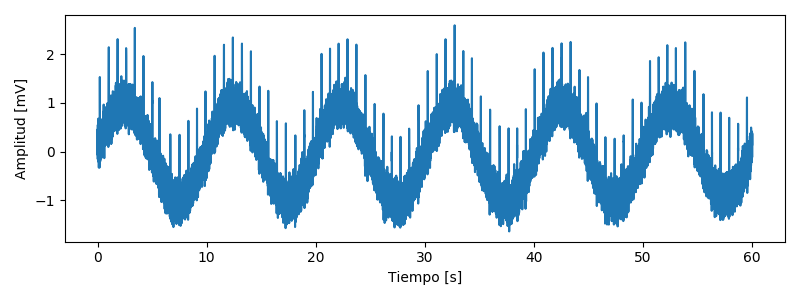

21600

In [77]:
import numpy as np
import pickle
%matplotlib notebook
import matplotlib.pylab as plt

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

fig, ax = plt.subplots(figsize=(8, 3), tight_layout=True)
ax.plot(np.arange(len(data))/360, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');

len(data)

Durante el proceso de captura ciertos errores provocaron que la señal se contaminara con

- Un ruido en torno a la frecuencia del sistema eléctrico
- Un ruido de baja frecuencia (tendencia) causado por un desperfecto del sensor
- Un ruido térmico que aparece en todo el rango de frecuencias (blanco)

Esto complica el análisis del médico por lo que el el hospital base de Valdivia los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

## Paso 1: Análisis de un ECG

Antes de diseñar el filtro visualize la señal en el espacio de frecuencias

Dado que la ECG es una **señal no estacionaria** lo más adecuado es estudiar su **espectrograma**: estimador del espectro de magnitud en función del tiempo

Utilize `scipy.signal.spectrogram` para visualizar el espectrograma del ECG

- Especifique la frecuencia de muestreo adecuadamente
- Utilice un largo de ventana (segmento) de 5x360 (5 segundos) y un traslape  (overlap) de 4x360 (4 segundos)
- Mejore la visualización utilizando el logaritmo del espectrograma (sume un pequeño factor 1e-5 para evitar indeficiones)

In [1]:
scipy.signal.spectrogram?

Object `scipy.signal.spectrogram` not found.


<IPython.core.display.Javascript object>


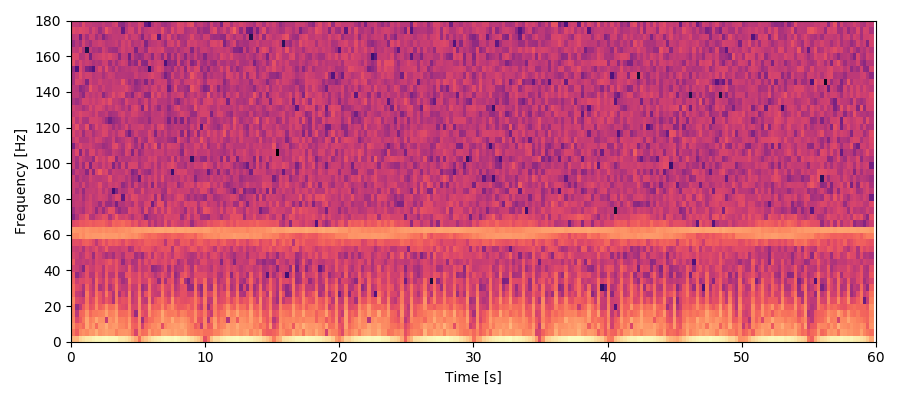

Text(0, 0.5, 'Frequency [Hz]')

In [8]:
import numpy as np
import scipy.signal
from scipy import fftpack
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib import animation, patches
from IPython.display import display, Audio, HTML
import pickle

with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)
    

fig, ax = plt.subplots(figsize=(9, 4), tight_layout=True)
freq, ttimes, Sxx = scipy.signal.spectrogram(data, fs=360,window=('tukey', 0.25), 
                                             nperseg=100, noverlap=None, detrend=False,
                                             return_onesided=True, scaling='density', mode='magnitude')
ax.pcolormesh(ttimes, freq, 20*np.log10(Sxx+1e-5), cmap=plt.cm.magma);ax.set_xlim([0.0,60]);ax.set_xlabel('Time [s]'); ax.set_ylabel('Frequency [Hz]')



#### Considerando el ritmo cardiaco de un ser humano normal y estudiando el espectrograma obtenido, responda: 

**Q:** ¿En qué rango de frecuencias (Hz) del espectrograma se espera encontrar la señal de ritmo cardiaco? 

- Analizadno el espectrograma obtenido anteriormente se espera encontrar el ritmo cardioca en frecuencias entre 0 [Hz] Y 40 [Hz]

**Q:** Identifique y describa el comportamiento espectral de las dos fuentes de ruido que se encuentran en el espectrograma

 - Observando el espectrograma se pueden identifcar varios cambios de frecuencias en el tiempo significativos, el primero tiene una tendencia a una frecuencia de 60 [Hz] y por lo que se sabe acerca de los ruidos del tipo electrico tienden a osicilar entre 50 [Hz] y 60 [Hz] por lo que ese ruido debe ser producido por el sistema electrico.
 - El otro ruido que se puede identificar esta en frecuencias muy bajas entre 0 [Hz] y 5 [Hz] a lo que deberia tratarse del ruido producido por el desperfecto del sensor que se uso para tomar los datos.

**Q:** Si tuviera que diseñar un filtro para eliminar este ruido, ¿De qué tipo sería? ¿Cuál o cuáles serían sus frecuencias de corte [Hz]?

**Q:** ¿Es posible eliminar completamente el ruido blanco con un filtro en frecuencia? ¿Por qué?

## Paso 2: Filtrado de un ECG

Diseñe un filtro para eliminar el ruido encontrado en el punto anterior considerando el tipo de filtro y la/las frecuencia/s de corte que especificó en el paso anterior

Obtenga la respuesta al impulso del filtro con la función `scipy.signal.firwin`. Utilice las ventanas `boxcar` (rectangular) y `hamming`. Consideré un número de coeficientes (`ntaps`) de 500 y 1000. Esto corresponde a 4 filtros. 

- Muestre en un gráfico la magnitud de la respuesta en frecuencia de los 4 filtros (use `scipy.signal.freqz`). Destaque las diferencias y semejanzas entre las respuestas en frecuencia contrastando con la teoría.

Filtre la señal convolucionando con la respuesta al impulso obtenida. Puede usar `scipy.signal.convolve` con `mode="same"`

- Para cada filtro: Grafique la señal filtrada y su espectrograma. Discuta sobre la efectividad del filtro
- Mida el tiempo que demora convolucionar la señal con cada filtro y construya una tabla (ver ejemplo) ¿Cuál es el filtro más eficiente? ¿Cuál es el menos eficiente?

<IPython.core.display.Javascript object>


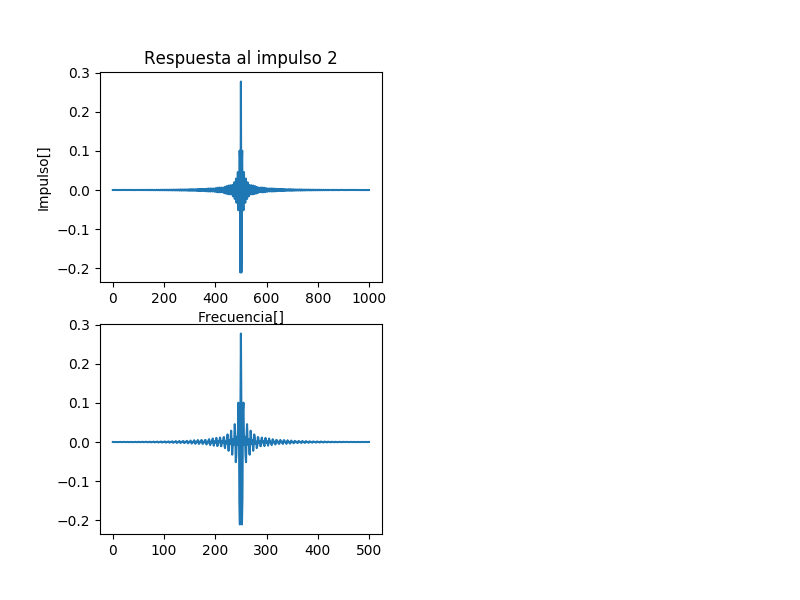

In [40]:
h1 = scipy.signal.firwin(numtaps=1000+1, cutoff=[50, 100], 
                        pass_zero=False, window='hamming',
                        fs=360)

h5 = scipy.signal.firwin(numtaps=500+1, cutoff=[50, 100], 
                        pass_zero=False, window='hamming',
                        fs=360)
b1 = scipy.signal.firwin(numtaps=1000+1, cutoff=[50, 100], 
                        pass_zero=False, window='boxcar',
                        fs=360)
b5 = scipy.signal.firwin(numtaps=500+1, cutoff=[50, 100], 
                        pass_zero=False, window='boxcar',
                        fs=360)


plt.close('all'); fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot2grid((2, 2 ), (0, 0)); ax1.set_title("Respuesta al impulso 1")
ax1.set_ylabel('Impulso[]')
ax1.set_xlabel('Frecuencia[]')
ax2 = plt.subplot2grid((2, 2 ), (1, 0)); ax1.set_title("Respuesta al impulso 2")


freq, response = scipy.signal.freqz(h)
ax1.plot(h1); 
ax2.plot(h5); 

In [ ]:
scipy.signal.freqz?

In [19]:
scipy.signal.firwin?

In [ ]:
scipy.signal.convolve?

In [ ]:
def ejemplo(x, y):
    return x**y

%timeit -n1 -r3 ejemplo(10, 10)

Supongamos ahora que el hospital gasta muchisimo dinero en un nuevo sensor de mejor calidad. Se mide el ECG del mismo paciente usando el sensor nuevo.

Use esta nueva señal para medir la calidad de sus filtros. Evalue usando la métrica de error cuadrático medio
$$
\text{MSE} = \frac{1}{N} \sum_{i=1}^N (x_i - y_i)^2
$$

- Calcule el error cuadrático medio entre la señal limpia y las señales filtradas. ¿Cuál filtro tiene el mejor rendimiento en términos de MSE? ¿Cuál filtro tiene el peor rendimiento?
- Muestre en un gráfico los primeros cinco segundos de la señal limpia, la señal sucia y la mejor señal filtrada en términos de MSE. Comente respecto a este resultado

In [ ]:
import pickle
with open("ECG_nueva.pkl", "rb") as f:
    data_clean = pickle.load(f)